# Neural Networks
This notebook demonstrates a simple Neural Network implemented using PyTorch on a real-world dataset (Wine dataset from sklearn).

In [25]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


## Load and Prepare the Data

In [26]:
# Load data
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

## Define a Simple Neural Network in PyTorch

In [27]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_dim = X_train.shape[1]
hidden_dim = 32
output_dim = len(np.unique(y))
model = SimpleNN(input_dim, hidden_dim, output_dim)

## Train the Neural Network and Plot Training Loss

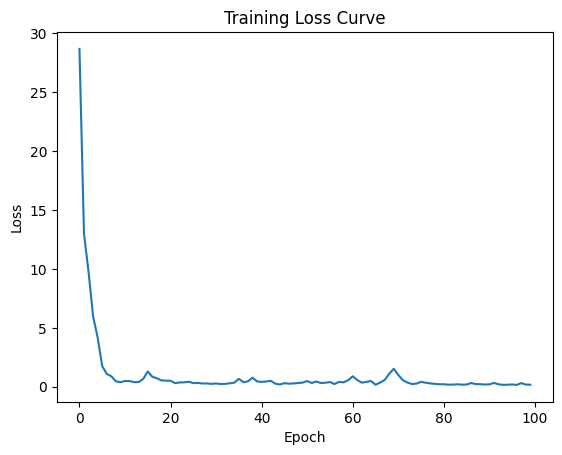

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X.size(0)
    losses.append(epoch_loss / len(train_loader.dataset))

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

## Evaluate the Model

In [29]:
y_pred = predicted.numpy()
y_true = y_test
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



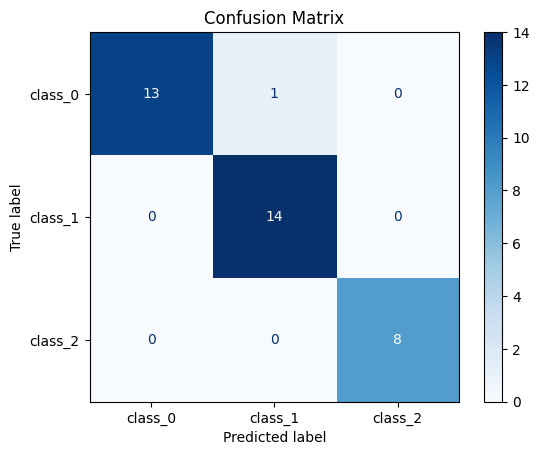

In [30]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Show 5 Examples

In [31]:
model.eval()
with torch.no_grad():
    # Print 5 prediction examples
    for i in range(5):
        print(f'Example {i+1}: True label = {y_test[i]}, Predicted = {predicted[i].item()}')

Example 1: True label = 0, Predicted = 0
Example 2: True label = 0, Predicted = 0
Example 3: True label = 2, Predicted = 2
Example 4: True label = 0, Predicted = 0
Example 5: True label = 1, Predicted = 1


## Analysis and Discussion
This notebook demonstrates the implementation of a simple neural network using PyTorch to classify wine samples from the Wine dataset. The dataset contains 13 features categorized into three classes. The neural network architecture consists of an input layer with 13 neurons (one for each feature), a hidden layer with 32 neurons and ReLU activation, and an output layer with 3 neurons (one for each class) using softmax activation (via CrossEntropyLoss). The model was trained for 100 epochs using the Adam optimizer with a learning rate of 0.01. The training loss decreased significantly over the epochs, indicating successful learning of patterns in the data. The final accuracy on the test set was 97.22%, which is a strong performance for this dataset. Strengths of the approach include its simplicity, high accuracy, and the use of visualizations such as the training loss curve and confusion matrix to provide insights into the model's performance. However, there are limitations, such as the potential risk of overfitting due to the small dataset size and the lack of hyperparameter tuning, which could further optimize the model's performance. Future improvements could include experimenting with different architectures, regularization techniques, and hyperparameter optimization to enhance the model's generalization ability.
